In [26]:
import glob 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
CMB = '06'

In [59]:
all_channels = glob.glob(f"files/wrd01_d2s01/cmb{CMB}_ch*.csv")
print('The first file is:', all_channels[0])

The first file is: files/wrd01_d2s01/cmb06_ch01.csv


In [44]:
df = pd.read_csv(all_channels[0], skiprows=9)
df.head()

,Time (s),Channel 1 (V),Channel 3 (V)
0,-0.000655,-0.000027,-0.021832
1,-0.000655,0.000400,-0.021667
2,-0.000655,0.000236,-0.021930
3,-0.000655,0.000432,-0.021272
4,-0.000655,0.000104,-0.021568


In [45]:
all_df = [pd.read_csv(file_channel, skiprows=9) for file_channel in all_channels]

## Plot all the waveforms for this CMB

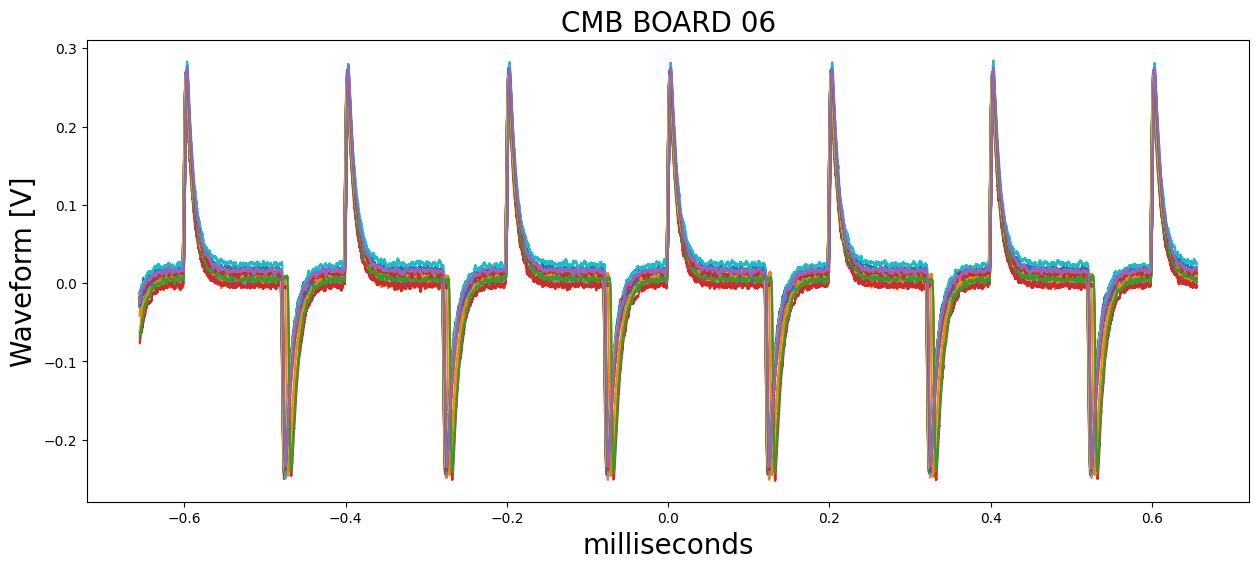

In [57]:
fig, ax = plt.subplots(figsize=(15,6))

for i, df in enumerate(all_df):
    ax.plot(df['Time (s)']*1e3, df['Channel 3 (V)'])

ax.set_xlabel("milliseconds", fontsize=20)
ax.set_ylabel("Waveform [V]", fontsize=20)
ax.set_title(f"CMB BOARD {CMB}", fontsize=20)
plt.savefig(f'plots/wrd01_d2s01/cmb{CMB}.png')

## Plot the amplituded for each channel

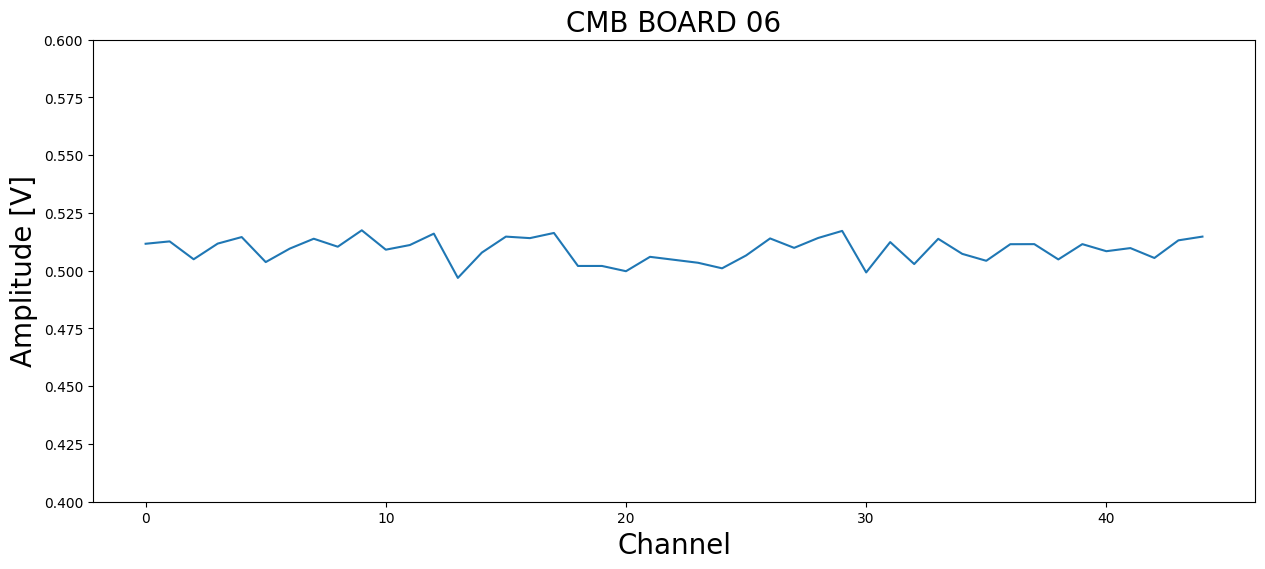

In [58]:
fig, ax = plt.subplots(figsize=(15,6))

x = []
y = []
for i, df in enumerate(all_df):
    amplitude = np.max(df['Channel 3 (V)']) -  np.min(df['Channel 3 (V)'])
    x.append(i)
    y.append(amplitude)


# print(i, amplitude)
ax.plot(x, y)

ax.set_ylim([0.4, 0.6])

ax.set_xlabel("Channel", fontsize=20)
ax.set_ylabel("Amplitude [V]", fontsize=20)
ax.set_title(f"CMB BOARD {CMB}", fontsize=20)
plt.savefig(f'plots/wrd01_d2s01/cmb{CMB}_amplitude.png')